I picked an image of the galaxy UGC 4879 onto which to apply a gravitational lens simulating effect. This galaxy is at a redshift of $z=0.000233$, which corresponds to a distance of about $D_s=3.08$ $10^{22}$ m away, and I chose to insert the "lens" at half that distance for simplicity's sake ($D_{ls}=D_l=1.54$ $10^{22}$ m). I found that for this simulation to work, $\theta_E$ $<$ $\sqrt{\frac{S}{2}+1}=24.6$, where $\theta_E$ is the Einstein radius and $S$ is the smallest dimension of my image. This put a restraint on the mass of my "lens" according to $M=\frac{c^2D_lD_s\theta_E^2}{4GD_{ls}}$ $\approx$ $9.58$ $10^{40}$ kg.

I first showed the original image of UGD 4879 with a small red ring that indicates the Einstein radius centered on the position of my lens. The next image is simply zoomed in so that a comparision can be made against the final image, which is also zoomed in and displays the applied graviational lensing effect. 

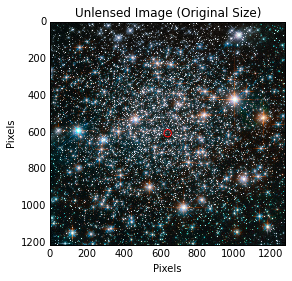

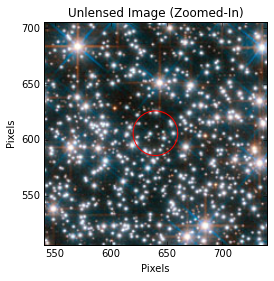

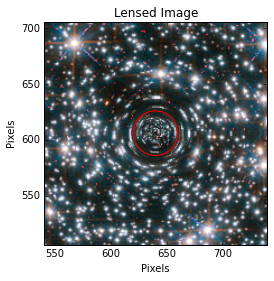

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#define parameters in SI units
G = 6.67*10**(-11)
M = 4.32*(10**37)
c = 3.*(10**8)
Ds = 1.39*(10**19)
Dl = 6.95*(10**18)
Dls = Dl

#import source image 
source = mpimg.imread('cluster.jpg')
#print source

#size of arrays
Sy = source.shape[0]
Sx = source.shape[1]

#define Einstein radius
#einstein radius in radians
thetaERad = (((4*G*M)/(c*c))*(Dls/(Dl*Ds)))**0.5
#einstein radius in arcseconds
thetaE = thetaERad/(4.8*10**(-6))

#redefine Einstein radius for debugging
#thetaE = (Sy/2)**0.5 #maximum
#print thetaE

#plot original source image
radiusE = plt.Circle((Sx/2,Sy/2), thetaE, color = 'r', fill = False)
ax = plt.gca()
ax.add_artist(radiusE)
sourceCheck = plt.imshow(source)
plt.title('Unlensed Image (Original Size)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

#establish array for lensed image
image = np.zeros((Sy, Sx, 3))
#print image
imageCheck = plt.imshow(image)
#plt.show()


#create image pixel by pixel by iterating through
for index, extra in np.ndenumerate(image):
    #skip center pixel to avoid divide by zero error
    while ((index[0] != Sy/2) or  (index[1] != Sx/2)):
        #coordinates from center of image
        x0 = index[1]-Sx/2
        y0 = index[0]-Sy/2
        #calculate theta and beta
        theta = (x0**2+y0**2)**0.5
        beta = theta - (thetaE**2/theta)
        #proportionality constant
        d = beta/theta
        #coordinates from center of source
        x = int(d*x0)
        y = int(d*y0)
        #take pixel from source to corresponding image pixel
        image[(index[0],index[1],index[2])] = 1-source[(y+Sy/2,x+Sx/2,index[2])]
        break
    #print index


#plot zoomed source image
radiusE = plt.Circle((Sx/2,Sy/2), thetaE, color = 'r', fill = False)
ax = plt.gca()
sourcePlot = plt.imshow(source)
ax.add_artist(radiusE)
plt.title("Unlensed Image (Zoomed-In)")
plt.axis([Sx/2-100,Sx/2+100,Sy/2-100,Sy/2+100])
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

#plot zoomed lensed image
radiusE = plt.Circle((Sx/2,Sy/2), thetaE, color = 'r', fill = False)
ax = plt.gca()
imagePlot = plt.imshow(image)
ax.add_artist(radiusE)
plt.title("Lensed Image")
plt.axis([Sx/2-100,Sx/2+100,Sy/2-100,Sy/2+100])
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()

